# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

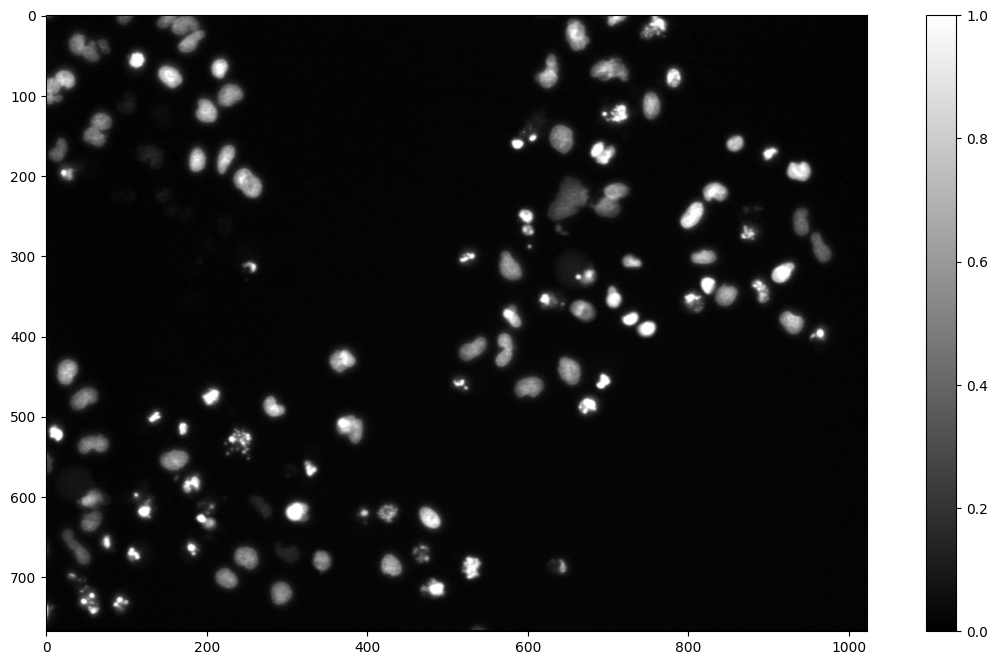

In [15]:
import numpy
import matplotlib.pyplot as plt
img = plt.imread('data/cells.png')
plt.figure(figsize=(15,8))
plt.imshow(img, 'gray')
plt.colorbar()

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

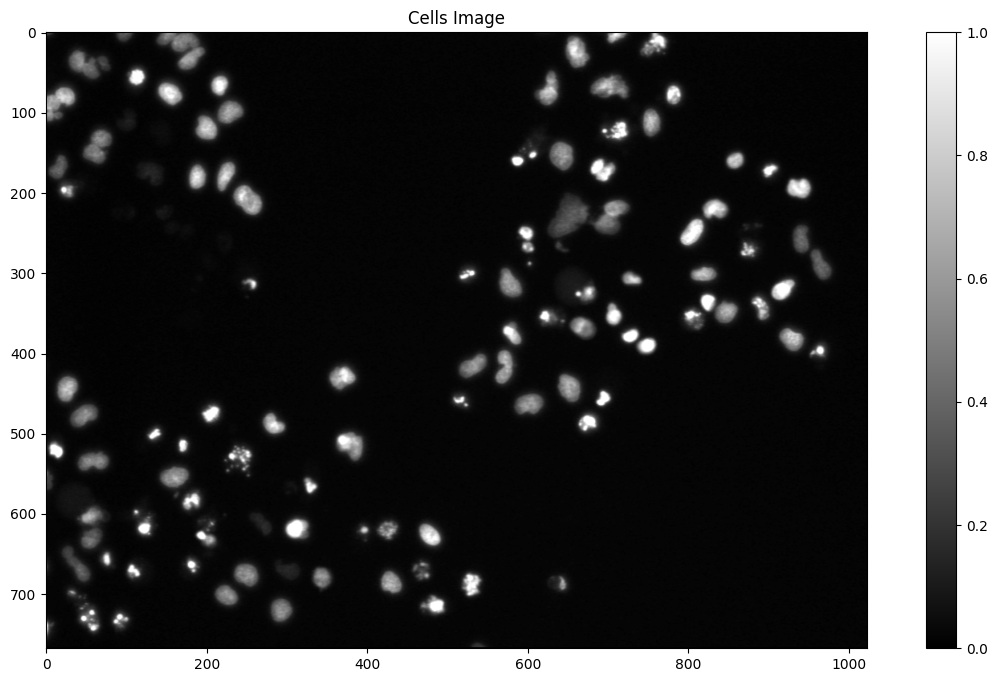

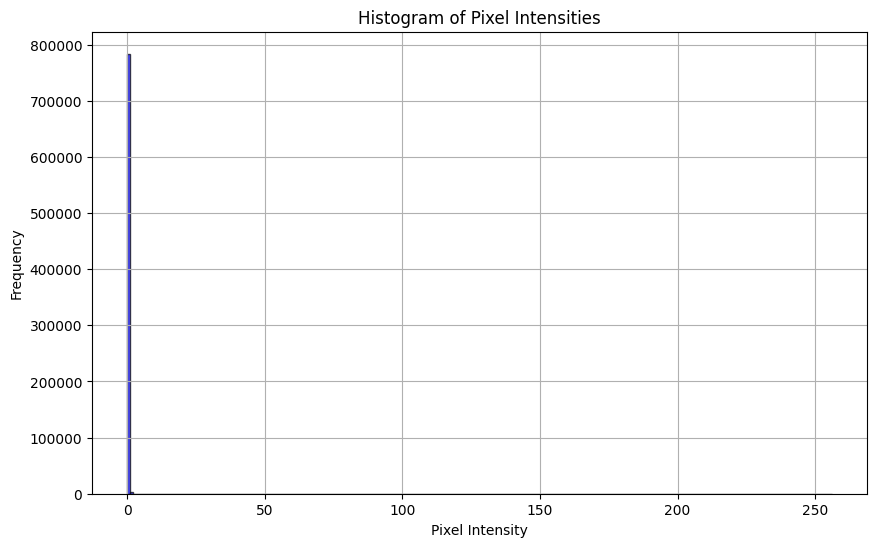

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image (already provided)
img = plt.imread('data/cells.png')

# Display the image with a colorbar (optional)
plt.figure(figsize=(15, 8))
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.title("Cells Image")
plt.show()

# Convert the image to grayscale if it has multiple channels.
# For example, if it's RGB, use the luminosity method.
if img.ndim == 3:
    # Use only the first three channels in case there is an alpha channel.
    img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img_gray = img

# Flatten the grayscale image using a list comprehension. so hätte es auch funtioniert:img_flat = img_gray.flatten()

img_flat = [
    pixel
    for row in img_gray
    for pixel in row
]


# Plot the histogram of pixel intensities.
plt.figure(figsize=(10, 6))
plt.hist(img_flat, bins=256, range=[0, 256], color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of Pixel Intensities")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()



---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [6]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

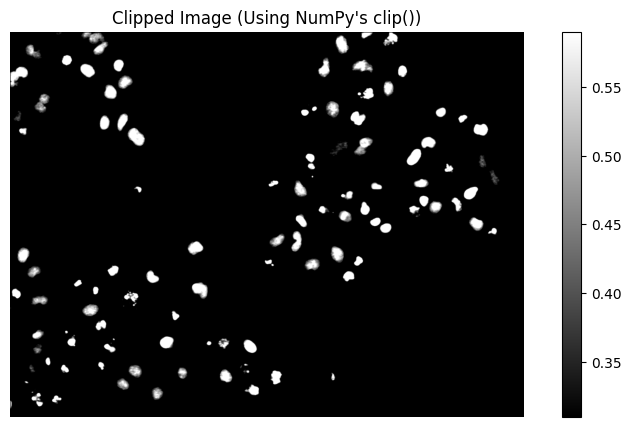

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('data/cells.png')

# Convert to grayscale if necessary
if img.ndim == 3:
    img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img_gray = img

# Define thresholds
T1 = 0.31
T2 = 0.59

# Apply intensity clipping using NumPy's clip() method
img_clipped = img_gray.clip(T1, T2)

# Display results
plt.figure(figsize=(10, 5))
plt.imshow(img_clipped, cmap='gray')
plt.colorbar()
plt.title("Clipped Image (Using NumPy's clip())")
plt.axis('off')
plt.show()


### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

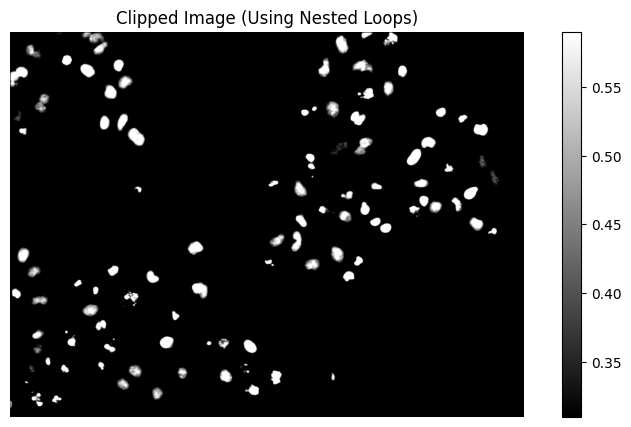

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('data/cells.png')

# Convert to grayscale if necessary
if img.ndim == 3:
    img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img_gray = img

# Define thresholds
T1 = 0.31
T2 = 0.59

# Create a copy of the image to modify
img_clipped = img_gray.copy()

# Manually apply intensity clipping using nested loops
for i in range(img_clipped.shape[0]):  # Loop through rows
    for j in range(img_clipped.shape[1]):  # Loop through columns
        if img_clipped[i, j] < T1:
            img_clipped[i, j] = T1
        elif img_clipped[i, j] > T2:
            img_clipped[i, j] = T2

# Display results
plt.figure(figsize=(10, 5))
plt.imshow(img_clipped, cmap='gray')
plt.colorbar()
plt.title("Clipped Image (Using Nested Loops)")
plt.axis('off')
plt.show()


**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

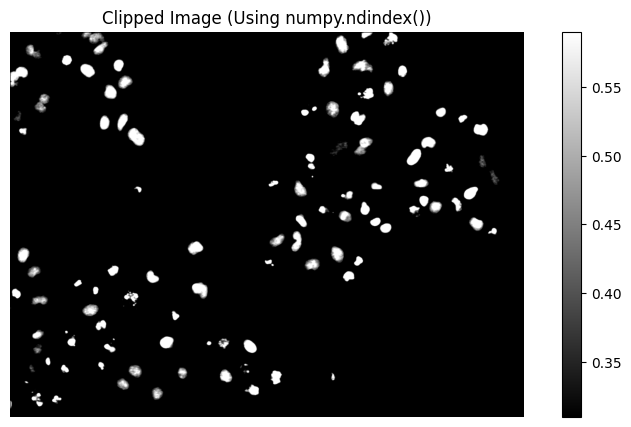

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = plt.imread('data/cells.png')

# Convert to grayscale if necessary
if img.ndim == 3:
    img_gray = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140])
else:
    img_gray = img

# Define thresholds
T1 = 0.31
T2 = 0.59

# Create a copy of the image to modify
img_clipped = img_gray.copy()

# Apply intensity clipping using numpy.ndindex() (avoiding explicit nested loops)
for idx in np.ndindex(img_clipped.shape):
    row, col = idx[0], idx[1]
    if img_clipped[row, col] < T1:
        img_clipped[row, col] = T1
    elif img_clipped[row, col] > T2:
        img_clipped[row, col] = T2

# Display results
plt.figure(figsize=(10, 5))
plt.imshow(img_clipped, cmap='gray')
plt.colorbar()
plt.title("Clipped Image (Using numpy.ndindex())")
plt.axis('off')
plt.show()


---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

In [7]:
def clip_image(img, T1, T2):
    # here goes your code
    return result

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [8]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

NameError: name 'result' is not defined

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

In [ ]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.3, 0.7))

# here goes your code